In [1]:
from matplotlib.pyplot import imshow
%matplotlib inline
import osmnx as ox

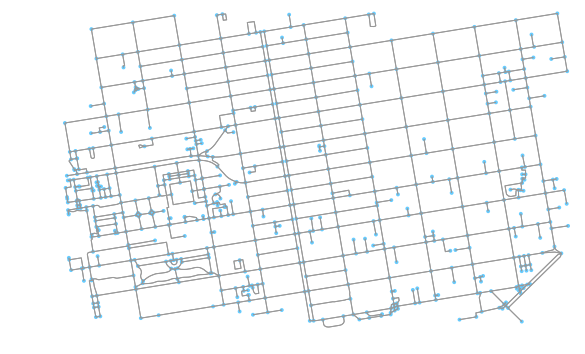

(<matplotlib.figure.Figure at 0x7f5d1020ccc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d1020c0f0>)

In [2]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='walk')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [3]:

G = ox.graph_from_place('New York, New York', network_type='walk')
G_projected = ox.project_graph(G)
ox.save_graph_shapefile(G_projected, filename='network-shape')

print(G)
# ox.plot_graph(ox.project_graph(G))

New York, New York


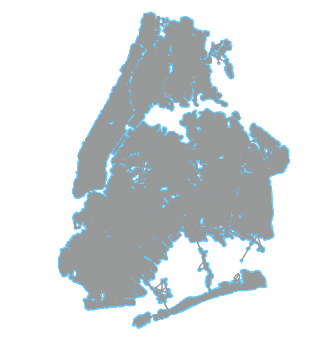

(<matplotlib.figure.Figure at 0x7f5cf0d59470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5cf0d59e80>)

In [4]:
ox.plot_graph(ox.project_graph(G))

In [14]:
gdf = ox.core.gdf_from_place("New York, New York")
gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-73.700181,40.916179,40.477399,-74.25909,"(POLYGON ((-74.25909 40.497207, -74.259028 40....","NYC, New York, United States of America"


In [17]:
polygon = gdf['geometry'].unary_union
ways_nodes = ox.core.osm_net_download(polygon, network_type="walk")

In [52]:
print(len(ways_nodes[0]['elements']))
print(ways_nodes[0].keys())
print(ways_nodes[0]['osm3s'])

377929
dict_keys(['version', 'generator', 'osm3s', 'elements'])
{'timestamp_osm_base': '2018-02-26T00:59:02Z', 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}


In [38]:
for node in ways_nodes[0]['elements']:
    loc = json.dumps(node)
    if "Terrace Drive" in loc:
        print(node)

{'type': 'way', 'id': 5671816, 'nodes': [42436475, 3278932288, 1472637761, 373268373, 373268484], 'tags': {'bicycle': 'yes', 'cycleway': 'lane', 'highway': 'unclassified', 'name': 'Terrace Drive', 'tiger:cfcc': 'A41', 'tiger:county': 'New York, NY', 'tiger:name_base': '72nd St Transverse', 'tiger:reviewed': 'no'}}
{'type': 'way', 'id': 23048632, 'nodes': [42435275, 1782787525], 'tags': {'bicycle': 'yes', 'cycleway': 'lane', 'highway': 'unclassified', 'name': 'Terrace Drive'}}
{'type': 'way', 'id': 23048647, 'nodes': [248709587, 2059303947, 248709588, 3248816675, 2059303948, 2059303949, 2059303950, 248709589, 248709590, 248709591, 248709592, 248709593, 248709594, 248709595], 'tags': {'bicycle': 'yes', 'cycleway': 'lane', 'highway': 'path', 'motor_vehicle': 'no', 'name': 'Terrace Drive', 'surface': 'asphalt'}}
{'type': 'way', 'id': 33080410, 'nodes': [373268478, 373268481, 2059303821, 373268483, 4331118556, 2059303824, 1472637772, 5416769301, 2059303825, 2059303826, 373268484], 'tags': {

In [27]:

import json
json.dump(ways_nodes, open('all.json', 'w'))